# memo
- suggestionの例
  - trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
  - trial.suggest_discrete_uniform('subsample', 0.1, 1.0, 0.1)
  - trial.suggest_int('n_estimators', 50, 400)
  - trial.suggest_loguniform('c', 1e-5, 1e2)
  - trial.suggest_uniform('dropout_rate', 0, 1.0)

# import library

In [0]:
!pip install optuna

     |████████████████████████████████| 143kB 3.2MB/s 
     |████████████████████████████████| 1.1MB 5.3MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 471kB 10.9MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 112kB 19.2MB/s 
     |████████████████████████████████| 51kB 10.1MB/s 
  Created wheel for optuna: filename=optuna-1.1.0-cp36-none-any.whl size=187322 sha256=5a1de232151f94e1c2e3468041166ccb1f2f4ccc1acbb6f7c47d2391b08eca1f
  Stored in directory: /root/.cache/pip/wheels/b7/25/09/6beaa68d3d3b4ea39b892927d70199ca762b04c72705bcc59e
  Created wheel for alembic: filename=alembic-1.4.0-py2.py3-none-any.whl size=157561 sha256=273ed93cd957c0ff79fd29aa000368e28eef59ad486f767b521ac775a0ea9f63
  Stored in directory: /root/.cache/pip/wheels/26/5e/30/84097f2b9e8215a03af766c647ac6dbef8f2f522af31e8c192
  Created wheel for Mako: filename=Mako-1.1.1-cp36-none-any.whl size=75410 sha256=205e5320c

In [0]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os, sys

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error,accuracy_score

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pprint

# Ex1. iris dataset

## read data

In [0]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target = boston.target

In [0]:
X = df
y = target

## optimazation

In [0]:
# 最小化したい関数
def func(trial):
  print('')
  params = {
      'n_estimators': int(trial.suggest_loguniform('n_estimators', 10, 1000)),
      'max_depth': trial.suggest_int('max_depth', 5, 300)
  }

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
  model = RandomForestRegressor(**params)
  model.fit(X_train, y_train)
  y_valid_pred = model.predict(X_valid)
  return mean_absolute_error(y_valid, y_valid_pred)



In [0]:
study = optuna.create_study()
study.optimize(func, n_trials = 10)
print(study.best_trial)
print(f'\n best_params = {study.best_params}')

[I 2020-02-17 04:51:10,551] Finished trial#0 resulted in value: 2.1854509803921576. Current best value is 2.1854509803921576 with parameters: {'n_estimators': 25.453803398774163, 'max_depth': 182}.
[I 2020-02-17 04:51:10,729] Finished trial#1 resulted in value: 2.1707749766573294. Current best value is 2.1707749766573294 with parameters: {'n_estimators': 21.620514370427415, 'max_depth': 132}.


[I 2020-02-17 04:51:11,470] Finished trial#2 resulted in value: 2.071349206349205. Current best value is 2.071349206349205 with parameters: {'n_estimators': 210.79079669723927, 'max_depth': 33}.


[I 2020-02-17 04:51:12,670] Finished trial#3 resulted in value: 2.0561774971768796. Current best value is 2.0561774971768796 with parameters: {'n_estimators': 382.40220989832966, 'max_depth': 156}.
[I 2020-02-17 04:51:12,850] Finished trial#4 resulted in value: 2.0369747899159663. Current best value is 2.0369747899159663 with parameters: {'n_estimators': 21.36501739317492, 'max_depth': 219}.


[I 2020-02-17 04:51:13,779] Finished trial#5 resulted in value: 2.066670205988533. Current best value is 2.0369747899159663 with parameters: {'n_estimators': 21.36501739317492, 'max_depth': 219}.


[I 2020-02-17 04:51:14,144] Finished trial#6 resulted in value: 2.0514363885088915. Current best value is 2.0369747899159663 with parameters: {'n_estimators': 21.36501739317492, 'max_depth': 219}.
[I 2020-02-17 04:51:14,311] Finished trial#7 resulted in value: 2.063235294117647. Current best value is 2.0369747899159663 with parameters: {'n_estimators': 21.36501739317492, 'max_depth': 219}.


[I 2020-02-17 04:51:14,475] Finished trial#8 resulted in value: 2.1994809688581314. Current best value is 2.0369747899159663 with parameters: {'n_estimators': 21.36501739317492, 'max_depth': 219}.


[I 2020-02-17 04:51:15,275] Finished trial#9 resulted in value: 2.0623561821422762. Current best value is 2.0369747899159663 with parameters: {'n_estimators': 21.36501739317492, 'max_depth': 219}.


FrozenTrial(number=4, value=2.0369747899159663, datetime_start=datetime.datetime(2020, 2, 17, 4, 51, 12, 671955), datetime_complete=datetime.datetime(2020, 2, 17, 4, 51, 12, 849996), params={'n_estimators': 21.36501739317492, 'max_depth': 219}, distributions={'n_estimators': LogUniformDistribution(high=1000, low=10), 'max_depth': IntUniformDistribution(high=300, low=5)}, user_attrs={}, system_attrs={'_number': 4}, intermediate_values={}, trial_id=4, state=TrialState.COMPLETE)

 best_params = {'n_estimators': 21.36501739317492, 'max_depth': 219}


# Ex2. Cifir-10

## read data

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


<function matplotlib.pyplot.show>

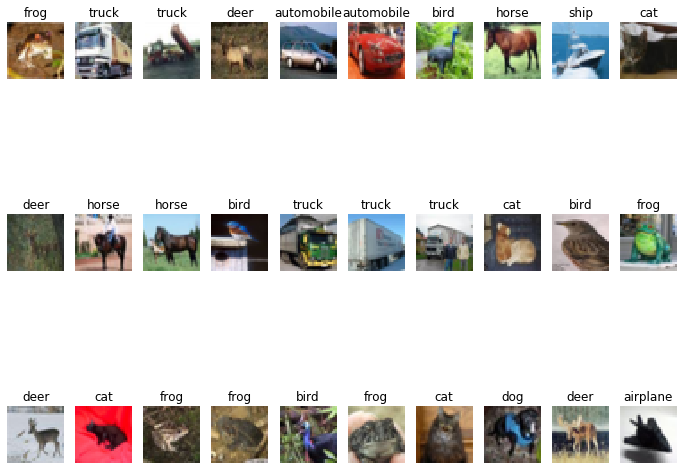

In [0]:
cifar10_labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

plt.figure(figsize=(12,10))
for index, img in enumerate(x_train[:30]):
  plt.subplot(3, 10, index+1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(cifar10_labels[y_train[index][0]])

plt.show

In [0]:
from keras import utils
#画像を0-1の範囲で正規化
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#正解ラベルをOne-Hot表現に変換
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [0]:
x_train.shape[1:],x_train.shape

((32, 32, 3), (50000, 32, 32, 3))

## まず普通にやってcnnが学習するのかテスト

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import np_utils

#モデルを構築
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=128,nb_epoch=20,verbose=1,validation_split=0.1)


#モデルの表示
model.summary()

#評価
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 6s 139us/step - loss: 1.6367 - acc: 0.4016 - val_loss: 1.2942 - val_acc: 0.5408
Epoch 2/20
45000/45000 [==============================] - 5s 119us/step - loss: 1.2170 - acc: 0.5646 - val_loss: 1.0275 - val_acc: 0.6492
Epoch 3/20
45000/45000 [==============================] - 5s 119us/step - loss: 1.0333 - acc: 0.6336 - val_loss: 0.9340 - val_acc: 0.6724
Epoch 4/20
45000/45000 [==============================] - 5s 120us/step - loss: 0.9171 - acc: 0.6756 - val_loss: 0.8072 - val_acc: 0.7222
Epoch 5/20
45000/45000 [==============================] - 5s 121us/step - loss: 0.8357 - acc: 0.7061 - val_loss: 0.7518 - val_acc: 0.7458
Epoch 6/20
45000/45000 [==============================] - 5s 119us/step - loss: 0.7748 - acc: 0.7282 - val_loss: 0.7147 - val_acc: 0.7518
Epoch 7/20
45000/45000 [==============================] - 5s 120us/step - loss: 0.7101 - acc: 0.7496 - val_loss: 0.7104 - v

学習できている

## optimization

#### define model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

def make_model(num_layer,activation,conv):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', activation=activation, input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), padding='same', activation=activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  for i in range(num_layer):
    model.add(Conv2D(conv, (3, 3), padding='same', activation=activation))
    model.add(Conv2D(conv, (3, 3), padding='same', activation=activation))
    model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256, activation=activation))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  return model

In [0]:
def objective(trial):

    #最適化するパラメータの設定
    #畳込み層の数
    num_layer = trial.suggest_int("num_layer", 1, 3)

    #FC層のユニット数
    conv = int(trial.suggest_discrete_uniform("conv", 16, 64, 8))

    #各畳込み層のフィルタ数
    #num_filters = [int(trial.suggest_discrete_uniform("num_filter_"+str(i), 16, 128, 16)) for i in range(num_layer)]

    #活性化関数
    activation = trial.suggest_categorical("activation", ["relu", "sigmoid", "tanh"])

    #optimizer
    optimizer = trial.suggest_categorical("optimizer", ["sgd", "adam", "rmsprop"])

    #model = create_model(num_layer, activation, mid_units, num_filters)
    model = make_model(num_layer,activation,conv)
    model.compile(optimizer=optimizer,
          loss="categorical_crossentropy",
          metrics=["accuracy"])

    history = model.fit(x_train, y_train, verbose=0, epochs=20, batch_size=128, validation_split=0.1)

    #検証用データに対する正答率が最大となるハイパーパラメータを求める
    return 1 - history.history["val_acc"][-1]

In [0]:
study = optuna.create_study()
study.optimize(objective, n_trials=10)

[I 2020-02-17 05:22:08,467] Finished trial#0 resulted in value: 0.8936. Current best value is 0.8936 with parameters: {'num_layer': 3, 'conv': 40.0, 'activation': 'tanh', 'optimizer': 'rmsprop'}.
[I 2020-02-17 05:25:06,191] Finished trial#1 resulted in value: 0.33520000000000005. Current best value is 0.33520000000000005 with parameters: {'num_layer': 3, 'conv': 64.0, 'activation': 'tanh', 'optimizer': 'sgd'}.
[I 2020-02-17 05:26:31,326] Finished trial#2 resulted in value: 0.25. Current best value is 0.25 with parameters: {'num_layer': 1, 'conv': 16.0, 'activation': 'relu', 'optimizer': 'adam'}.
[I 2020-02-17 05:29:17,684] Finished trial#3 resulted in value: 0.905. Current best value is 0.25 with parameters: {'num_layer': 1, 'conv': 16.0, 'activation': 'relu', 'optimizer': 'adam'}.
[I 2020-02-17 05:32:15,806] Finished trial#4 resulted in value: 0.40080000000000005. Current best value is 0.25 with parameters: {'num_layer': 1, 'conv': 16.0, 'activation': 'relu', 'optimizer': 'adam'}.
[I 

In [0]:
# 探索の履歴の可視化
df=study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,params_activation,params_conv,params_num_layer,params_optimizer,system_attrs__number,state
0,0,0.8936,2020-02-17 05:19:41.567467,2020-02-17 05:22:08.466788,tanh,40.0,3,rmsprop,0,COMPLETE
1,1,0.3352,2020-02-17 05:22:08.468312,2020-02-17 05:25:06.190833,tanh,64.0,3,sgd,1,COMPLETE
2,2,0.2500,2020-02-17 05:25:06.192303,2020-02-17 05:26:31.326143,relu,16.0,1,adam,2,COMPLETE
3,3,0.9050,2020-02-17 05:26:31.327572,2020-02-17 05:29:17.684003,sigmoid,56.0,3,sgd,3,COMPLETE
4,4,0.4008,2020-02-17 05:29:17.685403,2020-02-17 05:32:15.806236,relu,64.0,3,sgd,4,COMPLETE
5,5,0.3540,2020-02-17 05:32:15.810277,2020-02-17 05:34:38.730367,tanh,40.0,3,sgd,5,COMPLETE
6,6,0.3396,2020-02-17 05:34:38.731823,2020-02-17 05:37:01.656933,tanh,48.0,2,adam,6,COMPLETE
7,7,0.2782,2020-02-17 05:37:01.658932,2020-02-17 05:38:43.778314,relu,16.0,3,adam,7,COMPLETE
8,8,0.3668,2020-02-17 05:38:43.779873,2020-02-17 05:40:11.686735,tanh,16.0,2,sgd,8,COMPLETE
9,9,0.2256,2020-02-17 05:40:11.688268,2020-02-17 05:42:13.191510,relu,56.0,1,adam,9,COMPLETE


## result
求めたパラメータで実際に学習させて、うまく学習するか確かめる。

In [0]:
print(study.best_params)

{'num_layer': 1, 'conv': 56.0, 'activation': 'relu', 'optimizer': 'adam'}


In [0]:
model = make_model(study.best_params["num_layer"], study.best_params["activation"], int(study.best_params["conv"]))
optimizer = study.best_params["optimizer"]
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, verbose=1, epochs=20, batch_size=128, validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=32)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 9s 203us/step - loss: 1.6324 - acc: 0.4048 - val_loss: 1.3012 - val_acc: 0.5238
Epoch 2/20
45000/45000 [==============================] - 6s 135us/step - loss: 1.2690 - acc: 0.5456 - val_loss: 1.0506 - val_acc: 0.6326
Epoch 3/20
45000/45000 [==============================] - 6s 135us/step - loss: 1.1009 - acc: 0.6128 - val_loss: 0.9344 - val_acc: 0.6662
Epoch 4/20
45000/45000 [==============================] - 6s 135us/step - loss: 0.9853 - acc: 0.6537 - val_loss: 0.8543 - val_acc: 0.7068
Epoch 5/20
45000/45000 [==============================] - 6s 135us/step - loss: 0.8935 - acc: 0.6836 - val_loss: 0.8084 - val_acc: 0.7214
Epoch 6/20
45000/45000 [==============================] - 6s 136us/step - loss: 0.8198 - acc: 0.7117 - val_loss: 0.7771 - val_acc: 0.7270
Epoch 7/20
45000/45000 [==============================] - 6s 136us/step - loss: 0.7567 - acc: 0.7332 - val_loss: 0.7435 - v

In [0]:
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.826516360282898
Test accuracy: 0.7602
